# Adiabatic or abrupt changes in time

In [20]:
import numpy as np
import scipy.sparse
import scipy.linalg as la

In [21]:
from timeprop import propagate

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
import matplotlib.animation

In [24]:
def make_hamiltonian(L=100, pot_func=None, time=0):
    t = 1
    
    ham = np.zeros(shape=(L, L), dtype=complex)
    
    if pot_func is not None:
        pot = np.array([pot_func(i, time) for i in range(L)], dtype=float)
    else:
        pot = np.zeros(shape=(L,), dtype=float)

    np.fill_diagonal(ham, 2 * t + pot)
    
    offdiag = np.zeros(shape=(L-1,), dtype=complex)
    offdiag[:] = -t
    np.fill_diagonal(ham[1:, :-1], offdiag)
    np.fill_diagonal(ham[:-1, 1:], offdiag)
    
    # finally, periodic boundary conditions
    ham[0, -1] = -t
    ham[-1, 0] = -t
    
    return scipy.sparse.csr_matrix(ham), pot

### Let's look at an example potential

#### First a potential that changes abruptly in time

In [25]:
wf_index = 0

In [26]:
L = 200
def pot_abrupt(i, t):
    if t < 50:
        width = L/1.7
    else:
        width = L

    return np.tanh((i - width + 30) / 5) + 1 - np.tanh((i - 30) / 5) + 1

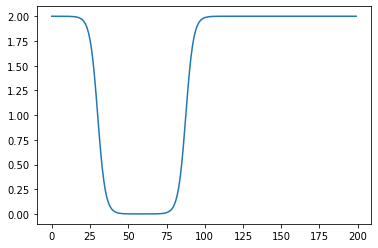

In [27]:
xs = np.arange(L)
plt.plot(xs, pot_abrupt(xs, 0))

In [53]:
ham, pot = make_hamiltonian(L, pot_abrupt, 0)
psi_0 = la.eigh(ham.todense())[1][:, 1]

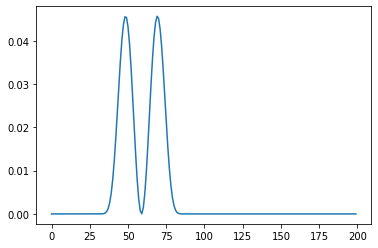

In [54]:
plt.plot(abs(psi_0)**2)

In [55]:
x = np.arange(L)

psis = []
pots = []
psi = psi_0.copy()
for n in range(300):
    ham, pot = make_hamiltonian(L, pot_abrupt, n)
    if n%3 == 0:
        pots.append(pot)
        psis.append(psi)
    psi = propagate(ham, psi, 10)

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
plt.close()  # this prevents the output of an empty frame
l1, = ax.plot(x, abs(psis[0])**2, label="$|\psi(x)|^2$")
l2, = ax.plot(x, pots[0], label="$V(x)$")
ax.set_xlabel("$x$")
ax.legend(loc="upper right")
ax.set_ylim(0, 0.05)


def animate(i):
    l1.set_data(x, abs(psis[i])**2)
    l2.set_data(x, pots[i])
    return (l1, l2)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(psis), interval=50);


In [57]:
from IPython.display import HTML
HTML(anim.to_jshtml())

#### Slow change of potential

In [70]:
wf_index = 1

In [71]:
L = 200
def pot_slow(i, t):
    width = L/1.7 + t/600 * (L - L/1.7)

    return np.tanh((i - width + 30) / 5) + 1 - np.tanh((i - 30) / 5) + 1

In [72]:
ham, pot = make_hamiltonian(L, pot_slow, 0)
psi_0 = la.eigh(ham.todense())[1][:, wf_index]

In [73]:
psis = []
pots = []
psi = psi_0.copy()
for n in range(600):
    ham, pot = make_hamiltonian(L, pot_slow, n)
    if n%6 == 0:
        pots.append(pot)
        psis.append(psi)
    psi = propagate(ham, psi, 2)

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
plt.close()  # this prevents the output of an empty frame
l1, = ax.plot(x, abs(psis[0])**2, label="$|\psi(x)|^2$")
l2, = ax.plot(x, pots[0], label="$V(x)$")
ax.set_xlabel("$x$")
ax.legend(loc="upper right")
ax.set_ylim(0, 0.05)


def animate(i):
    l1.set_data(x, abs(psis[i])**2)
    l2.set_data(x, pots[i])
    return (l1, l2)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(psis), interval=50);

In [75]:
HTML(anim.to_jshtml())